In [1]:
!pip install catboost
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv(r'drive/MyDrive/Skripsi/citarum.csv')

In [4]:
#Dropping unnecessary columns
cols_to_drop = ['Measuring_Point', 'Date', 'Temperatur', 'Debit']
df = df.drop(cols_to_drop, axis=1)
df.head()

,TDS,TSS,NH3,Surfactant,Phenol,Phospate,BOD,COD,OG,NO3,DO,pH,Cl3,Fecal_Coliform,Total_Coliform,Class
0,81.0,35.0,0.025,740.0,40.0,0.040,3.89,18.41,1000.0,1.12,7.04,7.79,0.01,24000,30000,4
1,254.0,20.0,0.060,60.0,1.0,0.006,0.16,0.49,1000.0,0.17,6.72,7.13,0.01,80000,110000,4
2,208.0,61.0,0.040,60.0,1.0,0.060,2.81,5.76,1000.0,1.76,5.77,6.77,0.01,160000,160000,4
3,220.0,35.0,0.100,290.0,50.0,0.120,3.03,37.40,1000.0,1.21,6.20,7.72,0.01,24000,30000,4
4,148.0,32.0,0.025,120.0,70.0,0.070,3.04,12.80,1000.0,1.36,8.80,6.96,0.01,50000,110000,4


In [5]:
#Seperating X & y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [6]:
#Splitting test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 29)

In [7]:
#Applying data standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
#Apply Naive ROS and create new X_train & y_train
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)

In [9]:
#Empty result dataframe
res = pd.DataFrame(index=['precision','recall','f1-score','accuracy'])

In [10]:
#Result Function
def result(clf, Classifier_Name, X_train, X_test):
  #Model Fitting
  clf.fit(X_train, y_train)
  
  #Showing performance result
  y_pred=clf.predict(X_test)
  from sklearn.metrics import classification_report
  clf_res = classification_report(y_test, y_pred, output_dict=True)

  #Append classifier result to result DataFrame
  res[str(Classifier_Name)] = [clf_res['weighted avg']['precision'],
                               clf_res['weighted avg']['recall'], 
                               clf_res['weighted avg']['f1-score'], 
                               clf_res['accuracy']]
  display(res)

  #Creating confusion matrix illustration
  from sklearn.metrics import ConfusionMatrixDisplay
  disp = ConfusionMatrixDisplay.from_estimator(
    clf, X_test, y_test, xticks_rotation="vertical", 
    display_labels=['Unsuitable', 'Very Poor', 'Poor', 'Good', 'Excellent'])
  disp.ax_.set_title("Confusion Matrix for " + str(Classifier_Name) + " Classifier")

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Decision Tree
precision,0.911765
recall,0.921569
f1-score,0.911655
accuracy,0.921569


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
15,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9803921568627451, 0.9607843137254902, 0.960...",0.978431,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.020161,0.015686,0.007843
14,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)","[1.0, 0.9705882352941176, 0.9705882352941176, ...",0.984314,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14)",0.017093,0.013299,0.006649
13,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 14)","[1.0, 0.9901960784313726, 0.9607843137254902, ...",0.986275,"(0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 14)",0.018859,0.014673,0.007337
12,"(0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 14)","[1.0, 1.0, 0.9607843137254902, 0.9803921568627...",0.988235,"(0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 14)",0.020161,0.015686,0.007843
11,"(0, 1, 2, 6, 7, 8, 9, 10, 11, 12, 14)","[1.0, 1.0, 0.9803921568627451, 0.9901960784313...",0.990196,"(0, 1, 2, 6, 7, 8, 9, 10, 11, 12, 14)",0.011271,0.008769,0.004384
10,"(0, 1, 2, 7, 8, 9, 10, 11, 12, 14)","[1.0, 1.0, 0.9901960784313726, 0.9901960784313...",0.994118,"(0, 1, 2, 7, 8, 9, 10, 11, 12, 14)",0.006173,0.004803,0.002401
9,"(0, 1, 2, 7, 8, 9, 11, 12, 14)","[1.0, 1.0, 0.9901960784313726, 1.0, 0.98039215...",0.994118,"(0, 1, 2, 7, 8, 9, 11, 12, 14)",0.010081,0.007843,0.003922
8,"(0, 1, 2, 7, 8, 11, 12, 14)","[1.0, 1.0, 0.9901960784313726, 1.0, 0.98039215...",0.994118,"(0, 1, 2, 7, 8, 11, 12, 14)",0.010081,0.007843,0.003922
7,"(0, 1, 2, 8, 11, 12, 14)","[1.0, 1.0, 0.9901960784313726, 1.0, 0.98039215...",0.994118,"(0, 1, 2, 8, 11, 12, 14)",0.010081,0.007843,0.003922
6,"(0, 1, 2, 8, 12, 14)","[1.0, 1.0, 0.9901960784313726, 1.0, 0.98039215...",0.994118,"(0, 1, 2, 8, 12, 14)",0.010081,0.007843,0.003922


('0', '1', '2', '7', '8', '9', '10', '11', '12', '14')

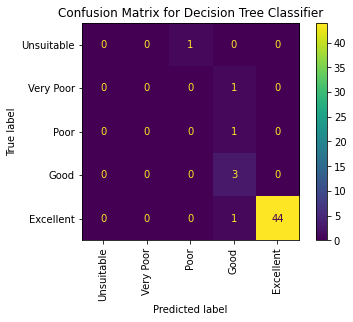

In [11]:
#Using Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
#Wrapper Feature Selection
#from sklearn.feature_selection import SequentialFeatureSelector
#sfs_dt = SequentialFeatureSelector(dt_clf, direction='backward')
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector
sfs_dt = SequentialFeatureSelector(dt_clf, forward=False, k_features="best")
sfs_dt.fit(X_train, y_train)
X_train_dt = sfs_dt.transform(X_train)
X_test_dt = sfs_dt.transform(X_test)

#Display Result
result(dt_clf, "Decision Tree", X_train_dt, X_test_dt)

#Creating selected features dataframe with corresponding column names
display(pd.DataFrame.from_dict(sfs_dt.get_metric_dict()).T)
display(sfs_dt.k_feature_names_)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Decision Tree,Random Forest
precision,0.911765,0.865248
recall,0.921569,0.901961
f1-score,0.911655,0.883205
accuracy,0.921569,0.901961


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
15,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9803921568627451, 1.0, 0.9607843137254902, ...",0.986275,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.018859,0.014673,0.007337
14,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)","[0.9901960784313726, 0.9901960784313726, 0.970...",0.988235,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)",0.012346,0.009606,0.004803
13,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)","[0.9901960784313726, 1.0, 0.9705882352941176, ...",0.990196,"(0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)",0.013804,0.01074,0.00537
12,"(0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13)","[1.0, 1.0, 0.9803921568627451, 1.0, 0.99019607...",0.994118,"(0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13)",0.010081,0.007843,0.003922
11,"(0, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13)","[1.0, 0.9803921568627451, 0.9901960784313726, ...",0.994118,"(0, 2, 3, 5, 6, 7, 8, 10, 11, 12, 13)",0.010081,0.007843,0.003922
10,"(0, 2, 3, 5, 6, 7, 8, 10, 12, 13)","[1.0, 0.9901960784313726, 0.9705882352941176, ...",0.992157,"(0, 2, 3, 5, 6, 7, 8, 10, 12, 13)",0.014695,0.011433,0.005717
9,"(0, 2, 3, 5, 7, 8, 10, 12, 13)","[1.0, 0.9901960784313726, 0.9901960784313726, ...",0.994118,"(0, 2, 3, 5, 7, 8, 10, 12, 13)",0.006173,0.004803,0.002401
8,"(2, 3, 5, 7, 8, 10, 12, 13)","[1.0, 0.9901960784313726, 0.9901960784313726, ...",0.994118,"(2, 3, 5, 7, 8, 10, 12, 13)",0.006173,0.004803,0.002401
7,"(2, 3, 5, 7, 10, 12, 13)","[1.0, 0.9901960784313726, 1.0, 1.0, 0.98039215...",0.994118,"(2, 3, 5, 7, 10, 12, 13)",0.010081,0.007843,0.003922
6,"(2, 3, 5, 7, 12, 13)","[1.0, 0.9803921568627451, 1.0, 1.0, 1.0]",0.996078,"(2, 3, 5, 7, 12, 13)",0.010081,0.007843,0.003922


('2', '3', '5', '7', '12', '13')

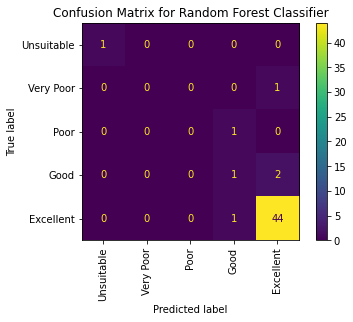

In [12]:
# Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

#Wrapper Feature Selection
sfs_rf = SequentialFeatureSelector(rf_clf, forward=False, k_features="best")
sfs_rf.fit(X_train, y_train)
X_train_rf = sfs_rf.transform(X_train)
X_test_rf = sfs_rf.transform(X_test)

#Display Result
result(rf_clf, "Random Forest", X_train_rf, X_test_rf)

display(pd.DataFrame.from_dict(sfs_rf.get_metric_dict()).T)
display(sfs_rf.k_feature_names_)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Decision Tree,Random Forest,SVM
precision,0.911765,0.865248,0.911319
recall,0.921569,0.901961,0.921569
f1-score,0.911655,0.883205,0.911434
accuracy,0.921569,0.901961,0.921569


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
15,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9215686274509803, 0.9411764705882353, 0.960...",0.956863,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.030451,0.023692,0.011846
14,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)","[0.9313725490196079, 0.9607843137254902, 0.980...",0.972549,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)",0.031275,0.024333,0.012166
13,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13)","[0.9313725490196079, 0.9705882352941176, 0.980...",0.97451,"(0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13)",0.030451,0.023692,0.011846
12,"(0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13)","[1.0, 0.9607843137254902, 0.9803921568627451, ...",0.986275,"(0, 1, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13)",0.018859,0.014673,0.007337
11,"(0, 1, 2, 3, 4, 7, 8, 9, 10, 12, 13)","[1.0, 0.9607843137254902, 0.9803921568627451, ...",0.986275,"(0, 1, 2, 3, 4, 7, 8, 9, 10, 12, 13)",0.018859,0.014673,0.007337
10,"(0, 1, 2, 3, 4, 7, 9, 10, 12, 13)","[1.0, 0.9607843137254902, 0.9803921568627451, ...",0.986275,"(0, 1, 2, 3, 4, 7, 9, 10, 12, 13)",0.018859,0.014673,0.007337
9,"(0, 1, 2, 3, 4, 9, 10, 12, 13)","[1.0, 0.9607843137254902, 0.9803921568627451, ...",0.986275,"(0, 1, 2, 3, 4, 9, 10, 12, 13)",0.018859,0.014673,0.007337
8,"(0, 1, 2, 3, 4, 9, 12, 13)","[1.0, 0.9607843137254902, 0.9901960784313726, ...",0.988235,"(0, 1, 2, 3, 4, 9, 12, 13)",0.018519,0.014409,0.007204
7,"(0, 1, 2, 4, 9, 12, 13)","[1.0, 0.9803921568627451, 0.9803921568627451, ...",0.990196,"(0, 1, 2, 4, 9, 12, 13)",0.011271,0.008769,0.004384
6,"(1, 2, 4, 9, 12, 13)","[1.0, 0.9803921568627451, 0.9901960784313726, ...",0.992157,"(1, 2, 4, 9, 12, 13)",0.00943,0.007337,0.003668


('1', '2', '4', '9', '12', '13')

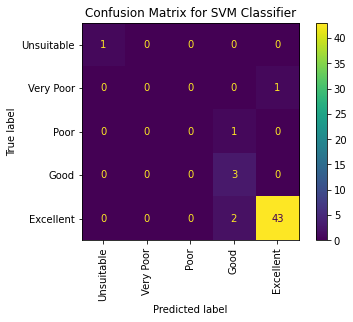

In [13]:
# Using Kernel SVM Classifier
from sklearn.svm import SVC
svm_clf = SVC(kernel = 'rbf', random_state = 0)

#Wrapper Feature Selection
sfs_svm = SequentialFeatureSelector(svm_clf, forward=False, k_features="best")
sfs_svm.fit(X_train, y_train)
X_train_svm = sfs_svm.transform(X_train)
X_test_svm = sfs_svm.transform(X_test)

result(svm_clf, "SVM", X_train_svm, X_test_svm)

display(pd.DataFrame.from_dict(sfs_svm.get_metric_dict()).T)
display(sfs_svm.k_feature_names_)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Decision Tree,Random Forest,SVM,Naive Bayes
precision,0.911765,0.865248,0.911319,0.900000
recall,0.921569,0.901961,0.921569,0.862745
f1-score,0.911655,0.883205,0.911434,0.868463
accuracy,0.921569,0.901961,0.921569,0.862745


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
15,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9803921568627451, 0.9509803921568627, 0.950...",0.968627,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.020161,0.015686,0.007843
14,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14)","[0.9803921568627451, 0.9509803921568627, 0.970...",0.972549,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14)",0.016717,0.013006,0.006503
13,"(0, 1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14)","[0.9803921568627451, 0.9509803921568627, 0.970...",0.97451,"(0, 1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14)",0.017093,0.013299,0.006649
12,"(0, 1, 2, 4, 6, 7, 9, 10, 11, 12, 13, 14)","[0.9803921568627451, 0.9705882352941176, 0.970...",0.978431,"(0, 1, 2, 4, 6, 7, 9, 10, 11, 12, 13, 14)",0.00943,0.007337,0.003668
11,"(1, 2, 4, 6, 7, 9, 10, 11, 12, 13, 14)","[0.9803921568627451, 0.9705882352941176, 0.970...",0.980392,"(1, 2, 4, 6, 7, 9, 10, 11, 12, 13, 14)",0.013804,0.01074,0.00537
10,"(1, 2, 4, 6, 7, 9, 10, 11, 12, 13)","[1.0, 0.9607843137254902, 0.9705882352941176, ...",0.982353,"(1, 2, 4, 6, 7, 9, 10, 11, 12, 13)",0.020161,0.015686,0.007843
9,"(1, 2, 4, 7, 9, 10, 11, 12, 13)","[1.0, 0.9607843137254902, 0.9803921568627451, ...",0.984314,"(1, 2, 4, 7, 9, 10, 11, 12, 13)",0.018859,0.014673,0.007337
8,"(1, 2, 4, 7, 9, 11, 12, 13)","[1.0, 0.9607843137254902, 0.9803921568627451, ...",0.984314,"(1, 2, 4, 7, 9, 11, 12, 13)",0.018859,0.014673,0.007337
7,"(1, 2, 4, 9, 11, 12, 13)","[1.0, 0.9607843137254902, 0.9803921568627451, ...",0.984314,"(1, 2, 4, 9, 11, 12, 13)",0.018859,0.014673,0.007337
6,"(2, 4, 9, 11, 12, 13)","[1.0, 0.9607843137254902, 0.9803921568627451, ...",0.984314,"(2, 4, 9, 11, 12, 13)",0.018859,0.014673,0.007337


('1', '2', '4', '7', '9', '10', '11', '12', '13')

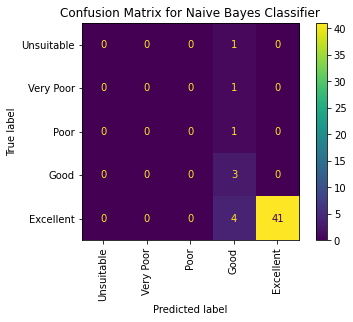

In [14]:
# Using Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()

#Wrapper Feature Selection
sfs_nb = SequentialFeatureSelector(nb_clf, forward=False, k_features="best")
sfs_nb.fit(X_train, y_train)
X_train_nb = sfs_nb.transform(X_train)
X_test_nb = sfs_nb.transform(X_test)

result(nb_clf, "Naive Bayes", X_train_nb, X_test_nb)

display(pd.DataFrame.from_dict(sfs_nb.get_metric_dict()).T)
display(sfs_nb.k_feature_names_)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Decision Tree,Random Forest,SVM,Naive Bayes,CatBoost
precision,0.911765,0.865248,0.911319,0.900000,0.865248
recall,0.921569,0.901961,0.921569,0.862745,0.901961
f1-score,0.911655,0.883205,0.911434,0.868463,0.883205
accuracy,0.921569,0.901961,0.921569,0.862745,0.901961


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
15,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9803921568627451, 0.9509803921568627, 0.950...",0.968627,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.020161,0.015686,0.007843
14,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14)","[0.9803921568627451, 0.9509803921568627, 0.970...",0.972549,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14)",0.016717,0.013006,0.006503
13,"(0, 1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14)","[0.9803921568627451, 0.9509803921568627, 0.970...",0.97451,"(0, 1, 2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14)",0.017093,0.013299,0.006649
12,"(0, 1, 2, 4, 6, 7, 9, 10, 11, 12, 13, 14)","[0.9803921568627451, 0.9705882352941176, 0.970...",0.978431,"(0, 1, 2, 4, 6, 7, 9, 10, 11, 12, 13, 14)",0.00943,0.007337,0.003668
11,"(1, 2, 4, 6, 7, 9, 10, 11, 12, 13, 14)","[0.9803921568627451, 0.9705882352941176, 0.970...",0.980392,"(1, 2, 4, 6, 7, 9, 10, 11, 12, 13, 14)",0.013804,0.01074,0.00537
10,"(1, 2, 4, 6, 7, 9, 10, 11, 12, 13)","[1.0, 0.9607843137254902, 0.9705882352941176, ...",0.982353,"(1, 2, 4, 6, 7, 9, 10, 11, 12, 13)",0.020161,0.015686,0.007843
9,"(1, 2, 4, 7, 9, 10, 11, 12, 13)","[1.0, 0.9607843137254902, 0.9803921568627451, ...",0.984314,"(1, 2, 4, 7, 9, 10, 11, 12, 13)",0.018859,0.014673,0.007337
8,"(1, 2, 4, 7, 9, 11, 12, 13)","[1.0, 0.9607843137254902, 0.9803921568627451, ...",0.984314,"(1, 2, 4, 7, 9, 11, 12, 13)",0.018859,0.014673,0.007337
7,"(1, 2, 4, 9, 11, 12, 13)","[1.0, 0.9607843137254902, 0.9803921568627451, ...",0.984314,"(1, 2, 4, 9, 11, 12, 13)",0.018859,0.014673,0.007337
6,"(2, 4, 9, 11, 12, 13)","[1.0, 0.9607843137254902, 0.9803921568627451, ...",0.984314,"(2, 4, 9, 11, 12, 13)",0.018859,0.014673,0.007337


('1', '2', '4', '7', '9', '10', '11', '12', '13')

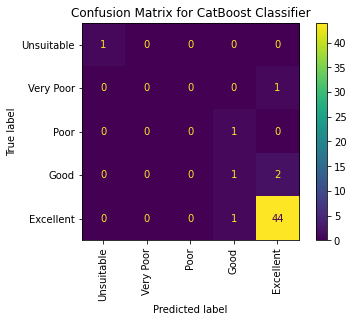

In [15]:
# Using CatBoost Classifier
from catboost import CatBoostClassifier
cb_clf = CatBoostClassifier(random_seed=42, logging_level='Silent')

#Wrapper Feature Selection
sfs_cb = SequentialFeatureSelector(cb_clf, forward=False, k_features="best")
sfs_cb.fit(X_train, y_train)
X_train_cb = sfs_cb.transform(X_train)
X_test_cb = sfs_cb.transform(X_test)

result(cb_clf, "CatBoost", X_train_cb, X_test_cb)

display(pd.DataFrame.from_dict(sfs_nb.get_metric_dict()).T)
display(sfs_nb.k_feature_names_)